In [12]:
#connect to s3 with the sdk
from boto.s3.connection import S3Connection
from PIL import Image 
import webbrowser
import datetime
import boto3
from boto.s3.key import Key

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
client = boto3.client('rekognition','us-east-1')
%matplotlib inline

#You must change these to your own password and bucket information.
conn = S3Connection()

from matplotlib.pyplot import imshow
import json
from pprint import pprint

%matplotlib inline
import matplotlib
matplotlib.rc("savefig", dpi=100)
import cv2
from collections import namedtuple

print ('done')

done


In [13]:
#print the bucket name and contents
mybuckets = conn.get_all_buckets()
print(len(mybuckets))

print ('print info about this bucket')
#this bucket is read-public, so feel free to follow this example code without changing 
#anything besides public/private key
bucketname='imageslabel'

s3bucket = conn.get_bucket(bucketname)
print(s3bucket)
size = 0
count = 0

for key in s3bucket.list():
    size += key.size
    count += 1
 
print ("%.3f GB" % (size*1.0/1024/1024/1024))
print ("num files: "+str(count))

for key in s3bucket.list():
        print ("{name}\t{size}\t{modified}".format(
                name = key.name,
                size = key.size,
                modified = key.last_modified,
                ))
        

2
print info about this bucket
<Bucket: imageslabel>
0.000 GB
num files: 5
Brad-Pitt.jpg	35503	2017-09-17T13:36:46.000Z
baby.jpg	66722	2017-09-17T13:36:43.000Z
banff-lake-morraine.jpg	71085	2017-09-17T13:36:45.000Z
football.jpg	221477	2017-09-17T13:36:47.000Z
scenery.jpg	48677	2017-09-17T13:36:48.000Z


In [14]:
#a demo of looping over a s3 bucket. printing out the MTCNN and the num_faces 
#from rekognition's api. Looking at printed output gives interesting results about errors
#coming from both sides. Errors are few though, and are usually worth taking in exchange
#for the cost savings
import commands
count=0
failcount=0
        
for key in s3bucket.list():
    #use this line to control how many loops
    if count==50:
        break
    count += 1
    if ((count % 100) == 0):
        print ('at count: '+str(count)+'\n')
        
    print(key.name)
    try:
        
        response = client.detect_labels(
            Image={
                'S3Object': {
                #marinus will need to change the bucket name to whichever they want to use
                'Bucket': bucketname,
                'Name': key.name
                #,'Version': '1'
            }
        },
            MaxLabels=10
        )
        
        #version 1: get ground truth from rekognition api
        num_api_labels=len(response['Labels'])
        print('Rekognition labels  count: '+str(num_api_labels))
        for label in response['Labels']:
            print("Identified: "+label['Name']+" , Confidence Level: "+str(label['Confidence']))
        
        print('')
       
    except:
        print ('failed on: '+key.name)
        print('')
        failcount=(failcount+1)
        

print('fail count '+str(failcount))
print('total number of photos processed '+str(failcount))

Brad-Pitt.jpg
Rekognition labels  count: 6
Identified: People , Confidence Level: 99.2324981689
Identified: Person , Confidence Level: 99.2324981689
Identified: Human , Confidence Level: 99.2228088379
Identified: Portrait , Confidence Level: 89.3517074585
Identified: Selfie , Confidence Level: 89.3517074585
Identified: Face , Confidence Level: 52.6858139038

baby.jpg
Rekognition labels  count: 10
Identified: People , Confidence Level: 99.2014083862
Identified: Person , Confidence Level: 99.2014083862
Identified: Human , Confidence Level: 99.1883850098
Identified: Crawling , Confidence Level: 97.9317932129
Identified: Animal , Confidence Level: 87.7852706909
Identified: Canine , Confidence Level: 87.7852706909
Identified: Dog , Confidence Level: 87.7852706909
Identified: Mammal , Confidence Level: 87.7852706909
Identified: Pet , Confidence Level: 87.7852706909
Identified: Terrier , Confidence Level: 87.7852706909

banff-lake-morraine.jpg
Rekognition labels  count: 10
Identified: Alps , 

baby.jpg


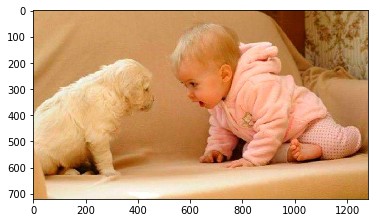

In [15]:
#retrieve and print a selected image
image='baby.jpg'.replace('+',' ')
print (image)
#make sure that you have the folder path in whatever instance is running this code
folder='/home/ubuntu/MTCNN-face-filter/'
temp_image=folder+'baby.jpg'

key = s3bucket.get_key(image)
#use the same file name for each temp image or you will start getting a ton of photos 
#stored in the folder
#also, if you are using your own bucket, you may need to tweak this code to handle '/'s
key.get_contents_to_filename(temp_image)                                                                  
pil_im = Image.open(temp_image, 'r')
imshow(np.asarray(pil_im))